<HR>

#### Imports

<HR>

In [1]:
#importing packages
%matplotlib inline
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
print('This data frame has {} rows and {} columns.'.format(df.shape[0], df.shape[1]))

This data frame has 284807 rows and 31 columns.


In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


##### Numerical Summary

In [5]:
pd.set_option('precision', 3)
df.loc[:, ['Time', 'Amount']].describe()

,Time,Amount
count,284807.000,284807.000
mean,94813.860,88.350
std,47488.146,250.120
min,0.000,0.000
25%,54201.500,5.600
50%,84692.000,22.000
75%,139320.500,77.165
max,172792.000,25691.160


<HR>
    
#### Frequency Distribution for Time & Amount

<HR>

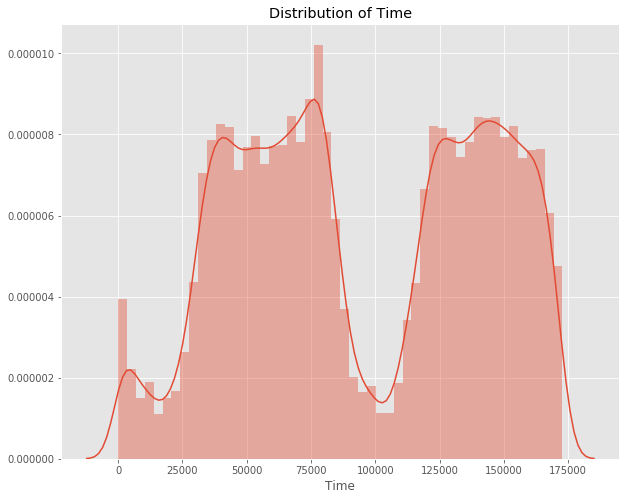

In [6]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Time')
sns.distplot(df.Time)

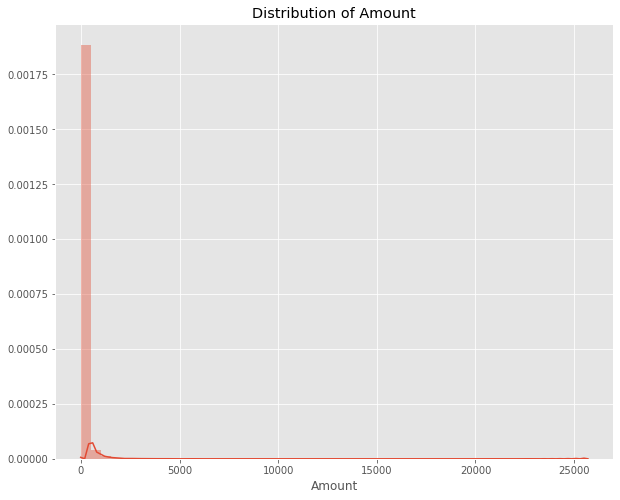

In [7]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Amount')
sns.distplot(df['Amount'])

<HR>

#### Class Imbalance

<HR>
    

In [13]:
 
ct = df.Class.value_counts()
normal = ct[0]
fraud = ct[1]
perc_normal = (normal/(normal+fraud))*100
perc_fraud = (fraud/(normal+fraud))*100


print('There were a total of {} non-fraud transactions ({:.3f}%) and {} fraud transactions ({:.3f}%).'.format(normal, perc_normal, fraud, perc_fraud))

There were a total of 284315 non-fraud transactions (99.827%) and 492 fraud transactions (0.173%).


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

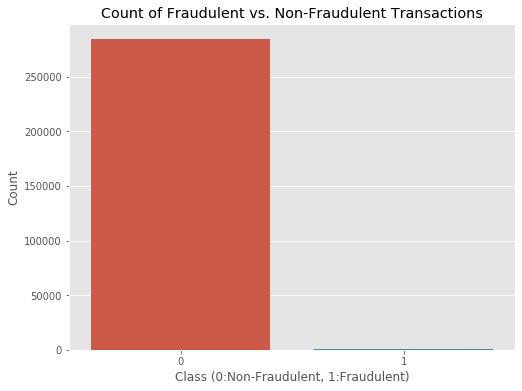

In [15]:
plt.figure(figsize=(8,6))
sns.barplot(x=ct.index, y=ct)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [16]:
corr = df.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000,1.174e-01,-1.059e-02,-4.196e-01,-1.053e-01,1.731e-01,-6.302e-02,8.471e-02,-3.695e-02,-8.660e-03,...,4.474e-02,1.441e-01,5.114e-02,-1.618e-02,-2.331e-01,-4.141e-02,-5.135e-03,-9.413e-03,-1.060e-02,-1.232e-02
V1,0.117,1.000e+00,4.697e-17,-1.424e-15,1.755e-17,6.391e-17,2.398e-16,1.992e-15,-9.491e-17,2.170e-16,...,-1.755e-16,7.477e-17,9.809e-16,7.354e-17,-9.805e-16,-8.622e-17,3.208e-17,9.821e-16,-2.277e-01,-1.013e-01
V2,-0.011,4.697e-17,1.000e+00,2.512e-16,-1.126e-16,-2.040e-16,5.025e-16,3.966e-16,-4.414e-17,-5.729e-17,...,8.444e-17,2.501e-16,1.060e-16,-8.142e-18,-4.262e-17,2.602e-16,-4.478e-16,-3.676e-16,-5.314e-01,9.129e-02
V3,-0.420,-1.424e-15,2.512e-16,1.000e+00,-3.417e-16,-1.437e-15,1.432e-15,2.169e-15,3.433e-16,-4.234e-16,...,-2.972e-17,4.648e-16,2.115e-17,-9.352e-17,4.771e-16,6.522e-16,6.240e-16,7.727e-16,-2.109e-01,-1.930e-01
V4,-0.105,1.755e-17,-1.126e-16,-3.417e-16,1.000e+00,-1.941e-15,-2.713e-16,1.556e-16,5.196e-16,3.860e-16,...,-9.977e-17,2.100e-16,6.003e-17,2.230e-16,5.395e-16,-6.180e-16,-6.403e-17,-5.864e-17,9.873e-02,1.334e-01
V5,0.173,6.391e-17,-2.040e-16,-1.437e-15,-1.941e-15,1.000e+00,7.926e-16,-4.210e-16,7.589e-16,4.205e-16,...,-1.369e-16,5.060e-16,1.638e-16,-9.286e-16,5.625e-16,9.145e-16,4.466e-16,-3.299e-16,-3.864e-01,-9.497e-02
V6,-0.063,2.398e-16,5.025e-16,1.432e-15,-2.713e-16,7.926e-16,1.000e+00,1.429e-16,-1.707e-16,1.114e-16,...,-1.576e-16,-3.363e-16,-7.232e-17,-1.262e-15,1.082e-15,-2.378e-16,-2.624e-16,4.813e-16,2.160e-01,-4.364e-02
V7,0.085,1.992e-15,3.966e-16,2.169e-15,1.556e-16,-4.210e-16,1.429e-16,1.000e+00,-8.692e-17,7.933e-16,...,1.939e-16,-1.058e-15,2.328e-16,-2.590e-17,1.174e-15,-7.335e-16,-5.887e-16,-6.837e-17,3.973e-01,-1.873e-01
V8,-0.037,-9.491e-17,-4.414e-17,3.433e-16,5.196e-16,7.589e-16,-1.707e-16,-8.692e-17,1.000e+00,2.901e-16,...,-2.412e-16,5.476e-16,3.897e-16,-1.803e-16,-1.391e-16,-1.210e-16,1.734e-16,-4.484e-16,-1.031e-01,1.988e-02
V9,-0.009,2.170e-16,-5.729e-17,-4.234e-16,3.860e-16,4.205e-16,1.114e-16,7.933e-16,2.901e-16,1.000e+00,...,4.578e-17,2.872e-17,5.929e-16,-2.346e-16,1.100e-15,-1.389e-15,-2.287e-16,9.147e-16,-4.425e-02,-9.773e-02


Text(0.5, 1, 'Heatmap of Correlation')

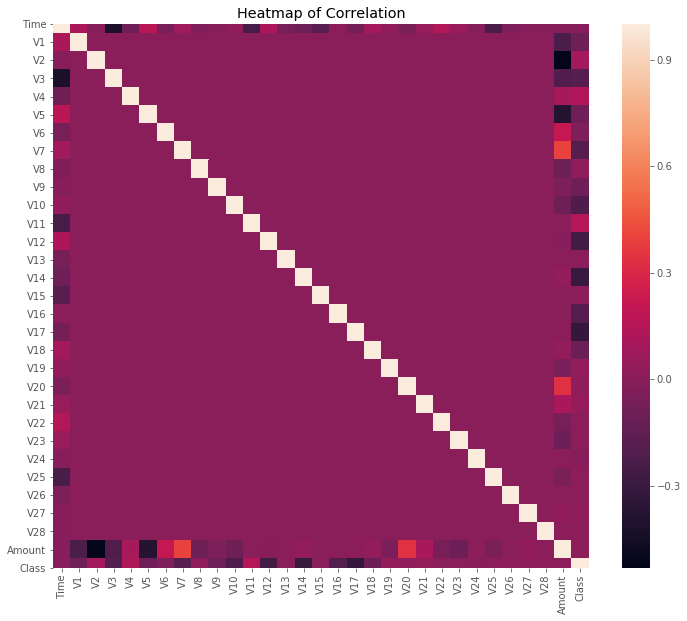

In [17]:
#heatmap
corr = df.corr()
plt.figure(figsize=(12,10))
heat = sns.heatmap(data=corr)
plt.title('Heatmap of Correlation')

In [18]:
#skewness
skew_ = df.skew()
skew_

Time      -0.036
V1        -3.281
V2        -4.625
V3        -2.240
V4         0.676
V5        -2.426
V6         1.827
V7         2.554
V8        -8.522
V9         0.555
V10        1.187
V11        0.357
V12       -2.278
V13        0.065
V14       -1.995
V15       -0.308
V16       -1.101
V17       -3.845
V18       -0.260
V19        0.109
V20       -2.037
V21        3.593
V22       -0.213
V23       -5.875
V24       -0.552
V25       -0.416
V26        0.577
V27       -1.170
V28       11.192
Amount    16.978
Class     23.998
dtype: float64

<HR>
    
#### Scaling Amount and Time

<hr>

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler2 = StandardScaler()
#scaling time
scaled_time = scaler.fit_transform(df[['Time']])
flat_list1 = [item for sublist in scaled_time.tolist() for item in sublist]
scaled_time = pd.Series(flat_list1)

In [20]:
#scaling the amount column
scaled_amount = scaler2.fit_transform(df[['Amount']])
flat_list2 = [item for sublist in scaled_amount.tolist() for item in sublist]
scaled_amount = pd.Series(flat_list2)

In [21]:
#concatenating newly created columns w original df
df = pd.concat([df, scaled_amount.rename('scaled_amount'), scaled_time.rename('scaled_time')], axis=1)
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,scaled_amount,scaled_time
129889,79234.0,1.190,0.527,0.429,2.162,0.266,0.292,0.018,0.096,-0.951,...,0.019,-0.579,0.334,-0.231,-0.012,0.011,10.19,0,-0.312,-0.328
152124,96920.0,-0.093,1.283,-0.277,-0.211,1.036,-0.818,0.941,-0.200,0.914,...,-0.286,-0.465,-0.428,-0.182,0.446,0.288,7.86,0,-0.322,0.044
63094,50550.0,-0.550,0.829,2.076,1.126,0.104,0.381,0.350,0.250,-0.653,...,-0.105,0.227,-0.102,-0.401,0.158,0.110,8.34,0,-0.320,-0.932
195033,130868.0,-2.237,-0.123,0.419,0.124,-0.208,1.817,-0.636,1.417,-1.813,...,-0.306,-1.683,0.382,-0.258,0.089,-0.171,128.00,0,0.159,0.759
50352,44458.0,0.746,-0.668,0.318,0.487,-0.442,0.345,-0.102,0.272,0.021,...,0.079,-0.312,-0.185,0.160,-0.049,0.035,199.35,0,0.444,-1.060


In [22]:
#dropping old amount and time columns
df.drop(['Amount', 'Time'], axis=1, inplace=True)

<hr>

#### Splitting Data into Train and Test

<HR>

In [23]:
#manual train test split using numpy's random.rand
mask = np.random.rand(len(df)) < 0.9
train = df[mask]
test = df[~mask]
print('Train Shape: {}\nTest Shape: {}'.format(train.shape, test.shape))

Train Shape: (256349, 31)
Test Shape: (28458, 31)


In [24]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

**Creating a subsample data set with balanced class distributions**

In [25]:
#how many random samples from normal transactions do we need?
no_of_frauds = train.Class.value_counts()[1]
print('There are {} fraudulent transactions in the train data.'.format(no_of_frauds))

There are 455 fraudulent transactions in the train data.


In [26]:
#randomly selecting 442 random non-fraudulent transactions
non_fraud = train[train['Class'] == 0]
fraud = train[train['Class'] == 1]

In [27]:
normal_sample = non_fraud.sample(no_of_frauds)
normal_sample.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
53351,1.325,0.307,0.066,0.772,0.229,-0.036,0.009,-0.052,0.193,-0.031,...,-1.074,-0.022,-1.065,0.475,-0.606,0.029,0.018,0,-0.349,-0.970
192967,2.064,0.496,-2.458,1.411,1.099,-0.807,0.610,-0.274,0.249,-0.338,...,-0.012,-0.015,0.271,0.501,-0.500,-0.005,-0.028,0,-0.349,0.943
171092,-0.065,0.666,-0.516,-0.076,0.883,-1.523,0.730,-0.162,0.199,-0.723,...,0.921,-0.105,-0.136,-0.358,-0.131,0.371,0.195,0,-0.308,0.713
218015,2.040,-0.127,-1.214,0.200,0.130,-0.579,0.050,-0.130,0.325,0.238,...,-0.646,0.287,-0.469,-0.294,0.209,-0.073,-0.075,0,-0.348,1.191
132116,1.957,-0.018,-2.171,0.444,0.638,-0.825,0.438,-0.290,0.374,-0.422,...,-0.620,0.142,0.340,-0.061,0.347,-0.087,-0.026,0,-0.059,-0.146


In [31]:
#concatenating both into a subsample data set with equal class distribution
normal_sample.reset_index(drop=True, inplace=True)
fraud.reset_index(drop=True, inplace=True)

In [32]:
balanced_df = pd.concat([normal_sample, fraud])
len(balanced_df)

910

In [33]:
#shuffling our data set
balanced_df = balanced_df.sample(frac=1).reset_index(drop=True)
balanced_df.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,0.909,1.338,-4.485,3.245,-0.418,-0.762,-2.506,0.694,-0.468,-4.565,...,0.594,-0.252,0.325,0.563,-0.256,0.653,0.320,1,-0.082,0.709
1,-0.687,1.489,1.066,0.308,-0.212,-0.976,0.290,0.264,0.699,-1.115,...,-0.876,0.065,0.270,-0.152,0.035,0.092,0.030,0,-0.313,-1.879
2,-1.431,-0.803,1.123,0.390,-0.281,-0.055,1.326,0.196,-0.547,-0.713,...,0.014,0.845,0.115,0.156,-0.619,-0.120,0.036,1,1.063,-0.211
3,1.194,-0.571,0.743,-0.015,-0.625,0.832,-0.833,0.273,1.169,-0.372,...,0.207,-0.265,-0.679,0.512,1.247,-0.029,-0.006,1,-0.226,-0.620
4,-2.179,0.020,-2.183,2.572,-3.664,0.082,0.268,0.660,-2.374,-3.583,...,0.300,1.657,0.328,0.106,0.692,0.197,0.241,1,2.514,-1.307
5,-1.686,-0.237,1.540,-1.603,-1.077,-0.402,-1.210,-0.053,-0.586,-0.019,...,0.796,-0.285,0.068,-0.013,-0.138,0.396,-0.078,0,-0.177,-0.922
6,-0.742,0.872,2.073,-0.166,0.189,-0.176,0.544,0.195,-0.920,-0.492,...,-0.431,-0.116,0.205,-0.019,0.128,0.018,0.056,0,-0.350,-0.270
7,-2.662,5.856,-7.654,6.380,-0.061,-3.132,-3.104,1.778,-3.831,-7.192,...,-0.436,-0.385,-0.286,1.008,0.413,0.280,0.304,1,-0.349,-1.810
8,0.998,-0.042,1.601,2.898,-0.483,1.476,-0.907,0.365,1.659,0.063,...,-0.237,-0.164,-0.517,0.465,0.022,0.030,0.021,0,-0.131,-1.858
9,1.200,0.560,-0.654,1.030,0.606,-0.071,0.072,0.122,-0.207,-0.536,...,-0.076,-0.184,-0.820,0.658,-0.270,0.043,0.036,0,-0.349,-0.625


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

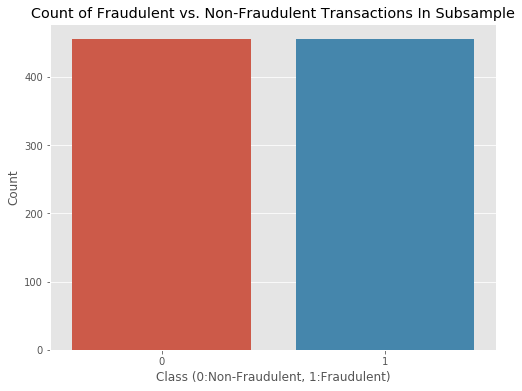

In [35]:
new_counts = balanced_df.Class.value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=new_counts.index, y=new_counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions In Subsample')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [36]:
#taking a look at correlations once more
corr = balanced_df.corr()
corr = corr[['Class']]
corr

,Class
V1,-0.410
V2,0.462
V3,-0.557
V4,0.713
V5,-0.356
V6,-0.400
V7,-0.471
V8,0.049
V9,-0.558
V10,-0.627


In [37]:
#negative correlations smaller than -0.5
corr[corr.Class < -0.5]

,Class
V3,-0.557
V9,-0.558
V10,-0.627
V12,-0.681
V14,-0.747
V16,-0.591
V17,-0.557


In [38]:
#positive correlations greater than 0.5
corr[corr.Class > 0.5]

,Class
V4,0.713
V11,0.687
Class,1.000


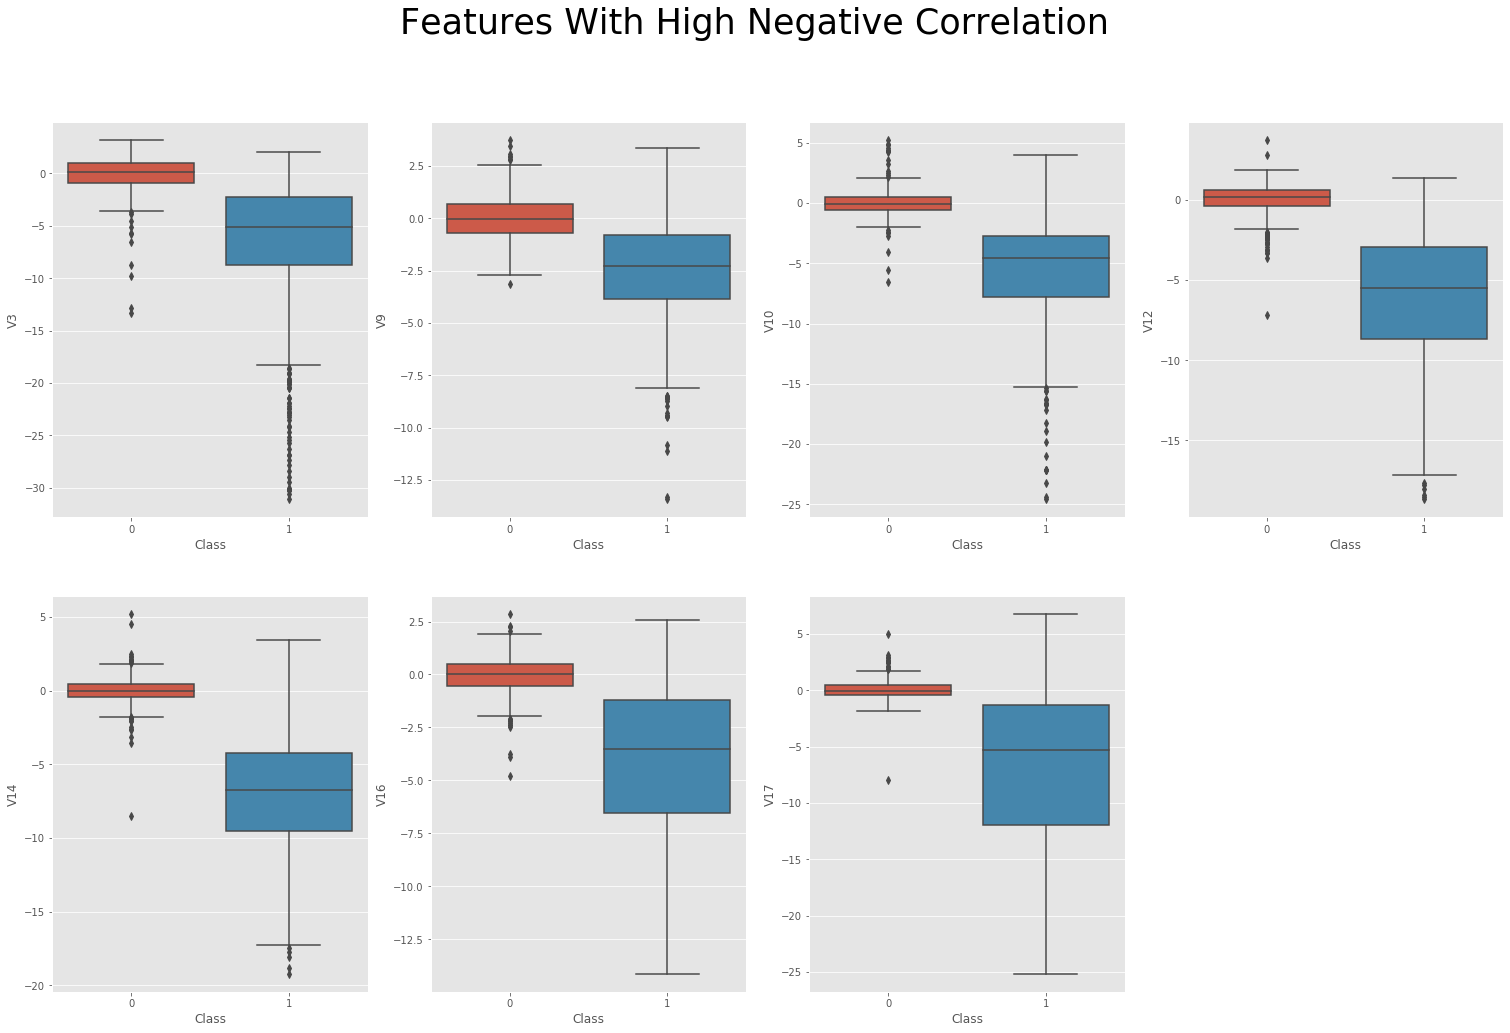

In [40]:
#visualizing the features w high negative correlation
f, axes = plt.subplots(nrows=2, ncols=4, figsize=(26,16))

f.suptitle('Features With High Negative Correlation', size=35)
sns.boxplot(x="Class", y="V3", data=balanced_df, ax=axes[0,0])
sns.boxplot(x="Class", y="V9", data=balanced_df, ax=axes[0,1])
sns.boxplot(x="Class", y="V10", data=balanced_df, ax=axes[0,2])
sns.boxplot(x="Class", y="V12", data=balanced_df, ax=axes[0,3])
sns.boxplot(x="Class", y="V14", data=balanced_df, ax=axes[1,0])
sns.boxplot(x="Class", y="V16", data=balanced_df, ax=axes[1,1])
sns.boxplot(x="Class", y="V17", data=balanced_df, ax=axes[1,2])
f.delaxes(axes[1,3])

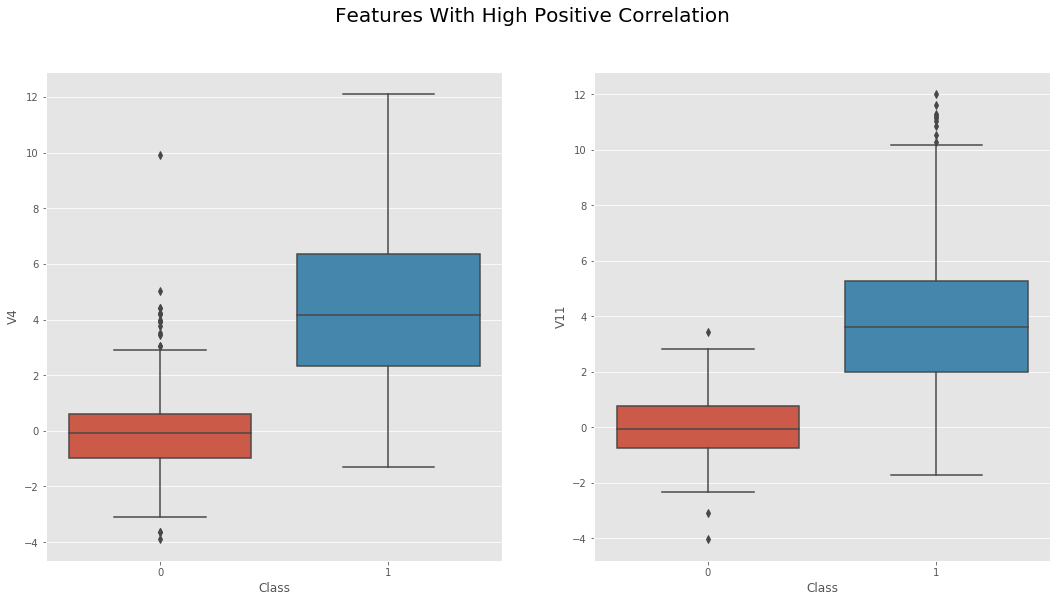

In [41]:
#visualizing the features w high positive correlation
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,9))

f.suptitle('Features With High Positive Correlation', size=20)
sns.boxplot(x="Class", y="V4",  data=balanced_df, ax=axes[0])
sns.boxplot(x="Class", y="V11", data=balanced_df, ax=axes[1])

**Extreme Outlier Removal**

In [42]:
#Only removing extreme outliers
Q1 = balanced_df.quantile(0.25)
Q3 = balanced_df.quantile(0.75)
IQR = Q3 - Q1

df2 = balanced_df[~((balanced_df < (Q1 - 2.5 * IQR)) |(balanced_df > (Q3 + 2.5 * IQR))).any(axis=1)]

In [44]:
len_after = len(df2)
len_before = len(balanced_df)
len_difference = len(balanced_df) - len(df2)
print('We reduced our data size from {} transactions by {} transactions to {} transactions.'.format(len_before, len_difference, len_after))

We reduced our data size from 910 transactions by 267 transactions to 643 transactions.


In [45]:
import dill
dill.dump_session('notebook_env.db')